# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Hendy Karles
- Email: hendy.karles@yahoo.com
- Id Dicoding: hendykarles

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn
!pip install --upgrade scikit-learn

In [3]:
import joblib
!pip install --upgrade joblib

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, classification_report, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Menyiapkan data yang akan digunakan

In [8]:
#dataset = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv"
dataset = "data.csv"
df = pd.read_csv(dataset)

## Data Understanding

Menampilkan 5 baris pertama dari dataframe


In [9]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Menampilkan jumlah baris dan kolom dataframe

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Menampilkan statistik deskriptif dari dataframe

In [11]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Menampilkan jumlah data duplikat dari dataframe

In [12]:
df.duplicated().sum()

np.int64(0)

Menampilkan missing value dari dataframe

In [13]:
df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


## Data Preparation / Preprocessing

### Exploratory Data Analysis

Menampilkan nilai unik dari kolom "Status"

In [14]:
df['Status'].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


In [15]:
df = df[df.Status!='Enrolled']

Menampilkan distribusi kolom "Status" dalam bentuk pie chart

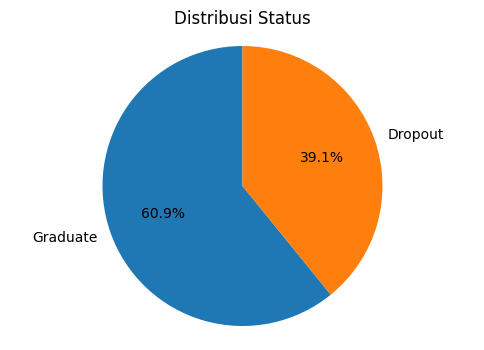

In [16]:
status_counts = df['Status'].value_counts()
labels = status_counts.index
sizes = status_counts.values

# Plotting
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%')
plt.title('Distribusi Status')
plt.axis('equal')
plt.show()

Mengubah nilai dalam kolom 'Status' menjadi numerik

In [17]:
df['Status']=df['Status'].map({'Dropout':0,
                                                 'Graduate':1
})

<ipython-input-17-8155e5bf3bd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Status']=df['Status'].map({'Dropout':0,


Menampilkan korelasi antar variabel dalam bentuk heatmap

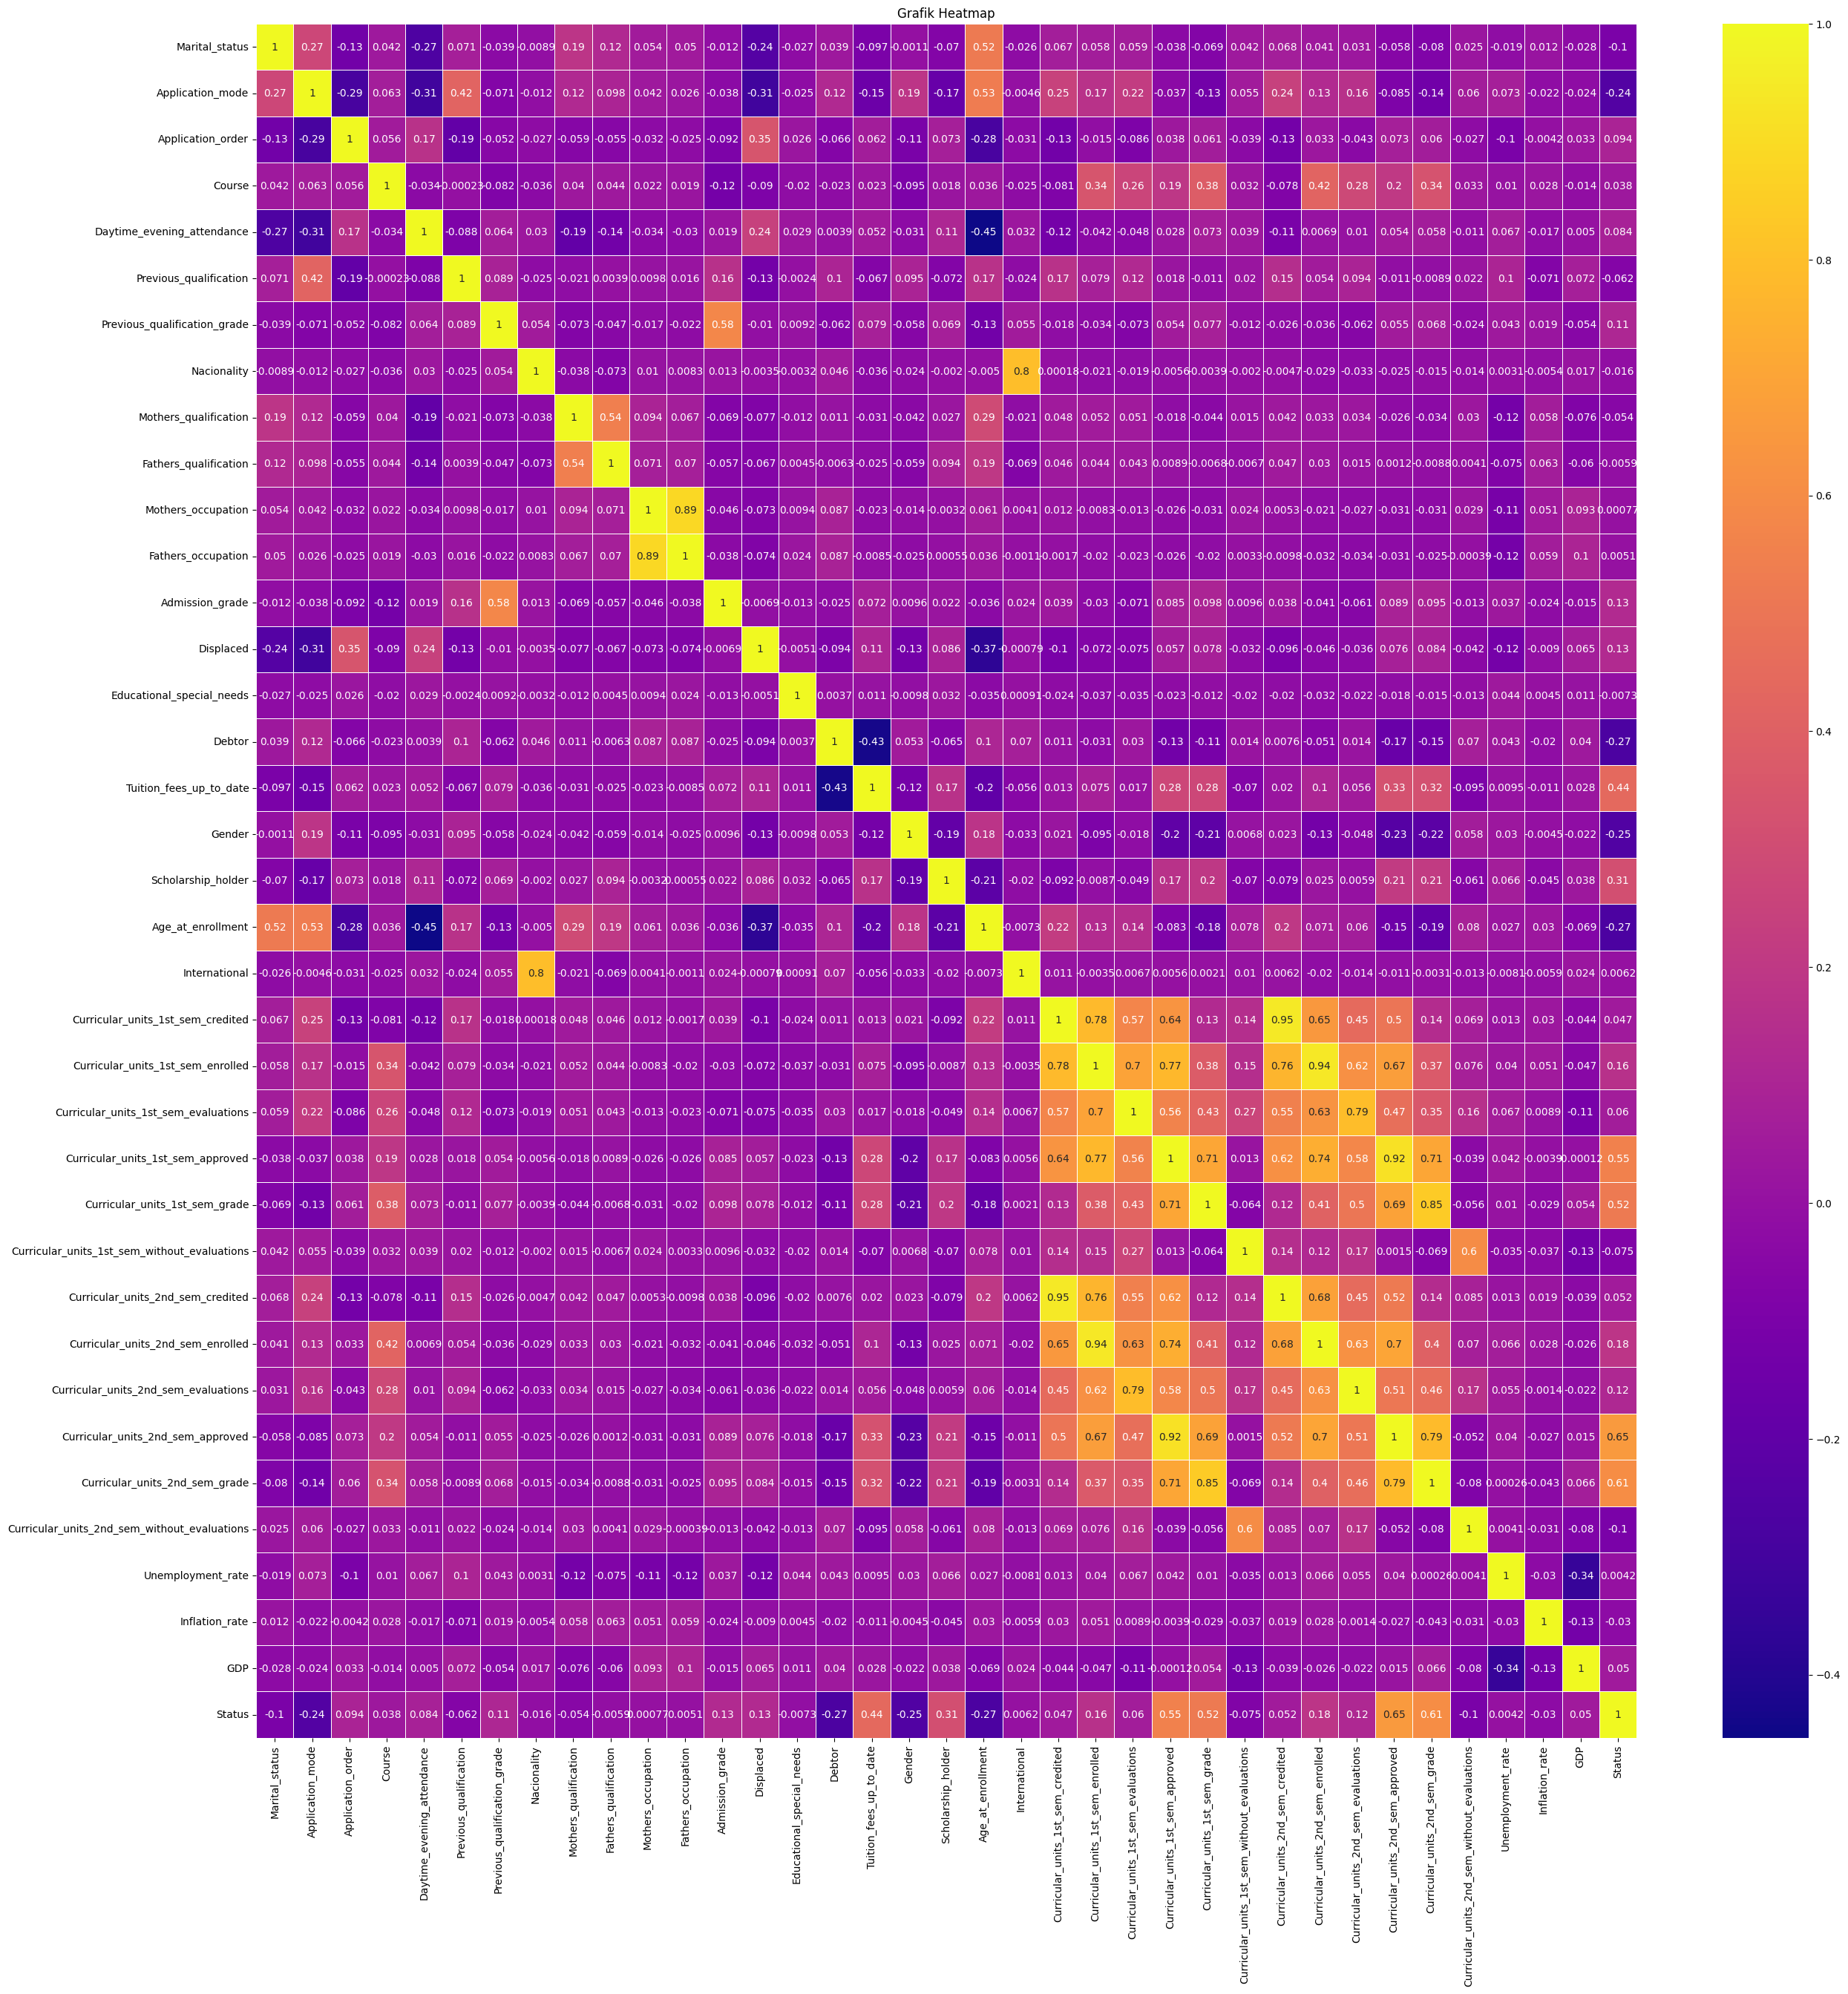

In [18]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap='plasma', linewidths=0.5)
plt.title('Grafik Heatmap')
plt.show()

Menampilkan korelasi antara "Status" dan variabel lainnya

In [19]:
df.corr()['Status']

,Status
Marital_status,-0.100479
Application_mode,-0.244507
Application_order,0.094355
Course,0.038135
Daytime_evening_attendance,0.084496
Previous_qualification,-0.062323
Previous_qualification_grade,0.109464
Nacionality,-0.015516
Mothers_qualification,-0.053989
Fathers_qualification,-0.005865


Mengeliminasi variabel yang mempunyai korelasi kecil terhadap "Status" dan tidak akan dipakai untuk melatih model

In [20]:
df.drop(columns=['Marital_status',
                          'Age_at_enrollment',
                          'Application_mode',
                          'Application_order',
                          'Course',
                          'Previous_qualification',
                          'Nacionality',
                          'Mothers_qualification',
                          'Fathers_qualification',
                          'Mothers_occupation',
                          'Fathers_occupation',
                          'Educational_special_needs',
                          'International',
                          'Curricular_units_1st_sem_evaluations',
                          'Curricular_units_1st_sem_without_evaluations',
                          'Curricular_units_2nd_sem_evaluations',
                          'Curricular_units_2nd_sem_without_evaluations',
                          'Unemployment_rate',
                          'Inflation_rate',
                          'GDP'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Daytime_evening_attendance         3630 non-null   int64  
 1   Previous_qualification_grade       3630 non-null   float64
 2   Admission_grade                    3630 non-null   float64
 3   Displaced                          3630 non-null   int64  
 4   Debtor                             3630 non-null   int64  
 5   Tuition_fees_up_to_date            3630 non-null   int64  
 6   Gender                             3630 non-null   int64  
 7   Scholarship_holder                 3630 non-null   int64  
 8   Curricular_units_1st_sem_credited  3630 non-null   int64  
 9   Curricular_units_1st_sem_enrolled  3630 non-null   int64  
 10  Curricular_units_1st_sem_approved  3630 non-null   int64  
 11  Curricular_units_1st_sem_grade     3630 non-null   float64
 1

Menampilkan korelasi antara "Status" dan variabel lain dalam bentuk bar chart yang diurutkan secara Descending

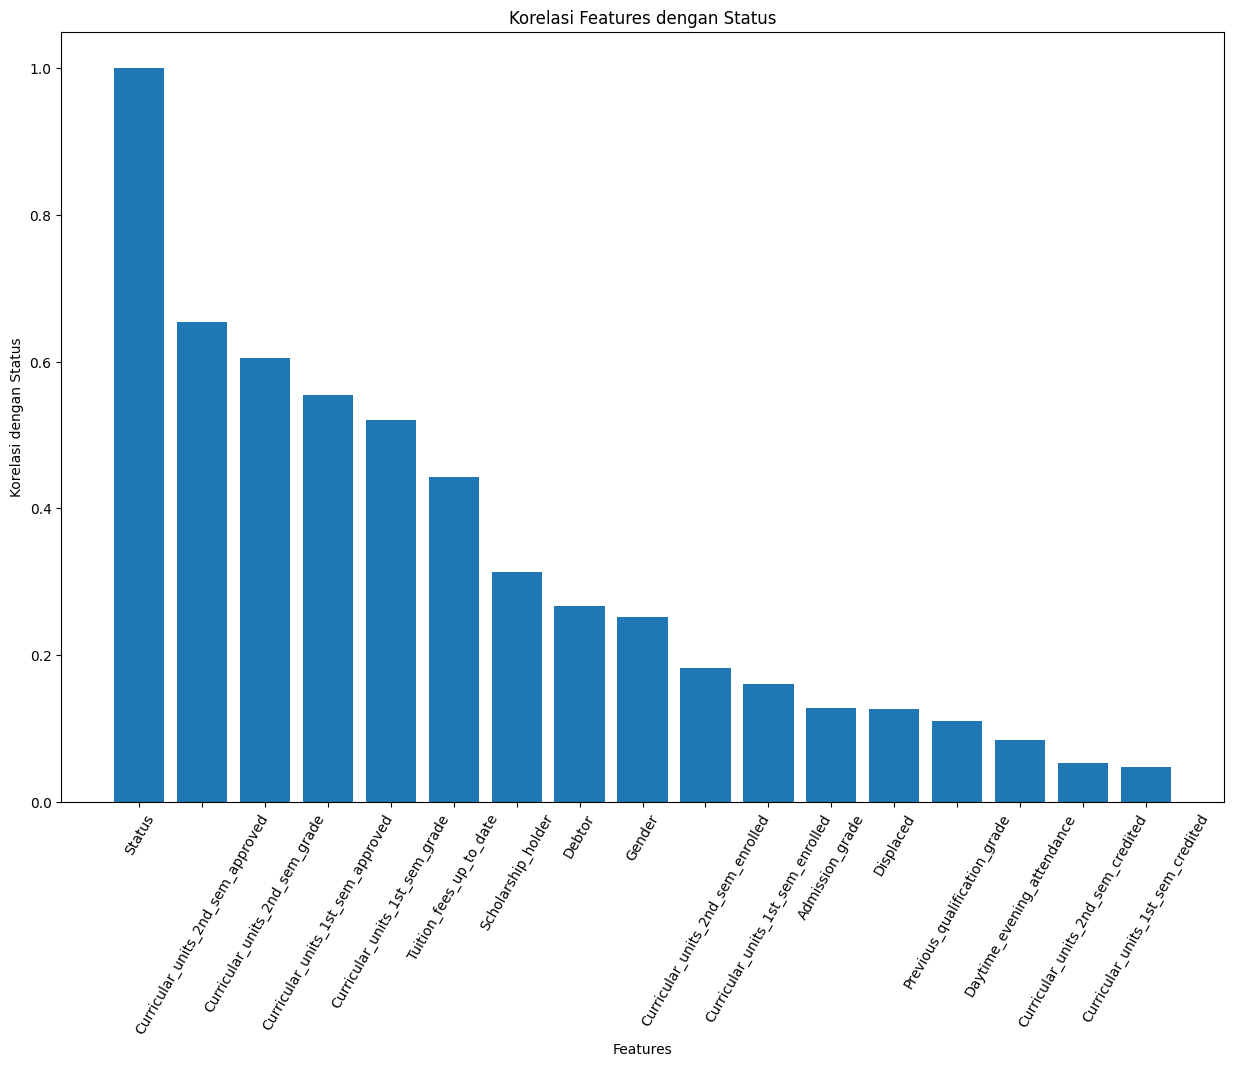

In [21]:
correlations = df.corr()['Status']
sorted_corr = correlations.abs().sort_values(ascending=False)

plt.figure(figsize=(15, 10))
plt.bar(sorted_corr.index, sorted_corr.values)
plt.xlabel('Features')
plt.ylabel('Korelasi dengan Status')
plt.title('Korelasi Features dengan Status')
plt.xticks(rotation=60)
plt.show()

Mengubah nilai beberapa variabel dari numerik menjadi string



In [22]:
df['Gender'] = df['Gender'].astype(str).replace({'0': 'Male', '1': 'Female'})
df['Displaced'] = df['Displaced'].astype(str).replace({'0': 'No', '1': 'Yes'})
df['Debtor'] = df['Debtor'].astype(str).replace({'0': 'No', '1': 'Yes'})
df['Scholarship_holder'] = df['Scholarship_holder'].astype(str).replace({'0': 'No', '1': 'Yes'})
df['Tuition_fees_up_to_date'] = df['Tuition_fees_up_to_date'].astype(str).replace({'0': 'No', '1': 'Yes'})
df['Daytime_evening_attendance'] = df['Daytime_evening_attendance'].astype(str).replace({'0': 'Evening', '1': 'Daytime'})
df['Status'] = df['Status'].astype(str).replace({'0': 'Dropout', '1': 'Graduate'})

Menampilkan korelasi "Status" dan beberapa variabel lainnya dalam bentuk subplot

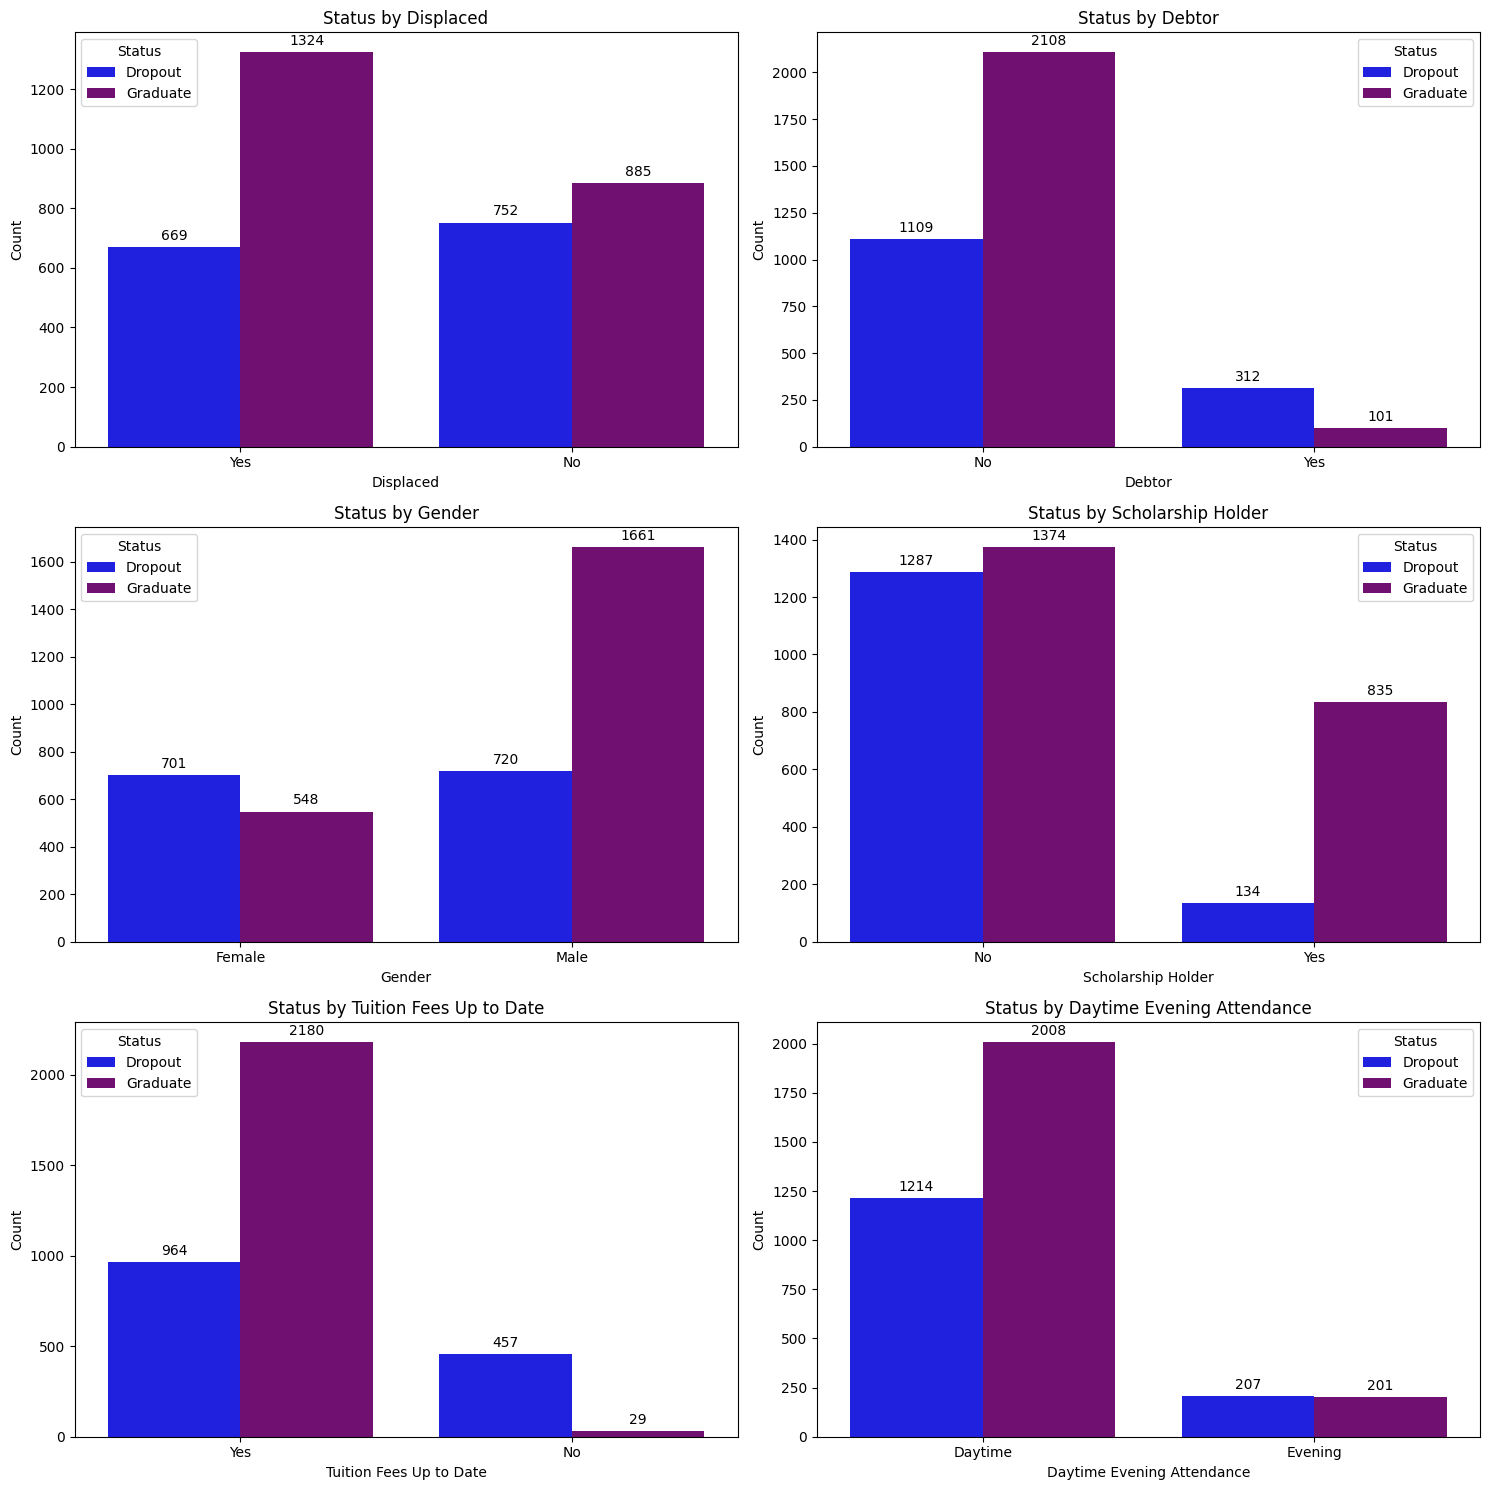

In [23]:
# Define color palette
colors = ['blue', 'Purple']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Grafik Status by Displaced
sns.countplot(x='Displaced', hue='Status', data=df, palette=colors, ax=axes[0, 0])
axes[0, 0].set_title('Status by Displaced')
axes[0, 0].set_xlabel('Displaced')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='Status', loc='upper left', labels=['Dropout','Graduate'])
for p in axes[0, 0].patches:
    if p.get_height() > 0:
        axes[0, 0].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Grafik Status by Debtor
sns.countplot(x='Debtor', hue='Status', data=df, palette=colors, ax=axes[0, 1])
axes[0, 1].set_title('Status by Debtor')
axes[0, 1].set_xlabel('Debtor')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='Status', loc='upper right', labels=['Dropout', 'Graduate'])
for p in axes[0, 1].patches:
    if p.get_height() > 0:
        axes[0, 1].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Grafik Status by Gender
sns.countplot(x='Gender', hue='Status', data=df, palette=colors, ax=axes[1, 0])
axes[1, 0].set_title('Status by Gender')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Status', loc='upper left', labels=['Dropout', 'Graduate'])
for p in axes[1, 0].patches:
    if p.get_height() > 0:
        axes[1, 0].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Grafik Status by Scholarship Holder
sns.countplot(x='Scholarship_holder', hue='Status', data=df, palette=colors, ax=axes[1, 1])
axes[1, 1].set_title('Status by Scholarship Holder')
axes[1, 1].set_xlabel('Scholarship Holder')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Status', loc='upper right', labels=['Dropout', 'Graduate'])
for p in axes[1, 1].patches:
    if p.get_height() > 0:
        axes[1, 1].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Grafik Status by Tuition Fees Up to Date
sns.countplot(x='Tuition_fees_up_to_date', hue='Status', data=df, palette=colors, ax=axes[2, 0])
axes[2, 0].set_title('Status by Tuition Fees Up to Date')
axes[2, 0].set_xlabel('Tuition Fees Up to Date')
axes[2, 0].set_ylabel('Count')
axes[2, 0].legend(title='Status', loc='upper left', labels=['Dropout', 'Graduate'])
for p in axes[2, 0].patches:
    if p.get_height() > 0:
        axes[2, 0].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Grafik Status by Daytime Evening Attendance
sns.countplot(x='Daytime_evening_attendance', hue='Status', data=df, palette=colors, ax=axes[2, 1])
axes[2, 1].set_title('Status by Daytime Evening Attendance')
axes[2, 1].set_xlabel('Daytime Evening Attendance')
axes[2, 1].set_ylabel('Count')
axes[2, 1].legend(title='Status', loc='upper right', labels=['Dropout','Graduate'])
for p in axes[2, 1].patches:
    if p.get_height() > 0:
        axes[2, 1].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()


## Modeling

Filter Variable Kategorial

In [24]:
category_cols = df.select_dtypes(exclude=['int32','int64','float32','float64'])
category_cols.head()

,Daytime_evening_attendance,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Status
0,Daytime,Yes,No,Yes,Female,No,Dropout
1,Daytime,Yes,No,No,Female,No,Graduate
2,Daytime,Yes,No,No,Female,No,Dropout
3,Daytime,Yes,No,Yes,Male,No,Graduate
4,Evening,No,No,Yes,Male,No,Graduate


Persiapan pembuatan direktori "model"

In [25]:
import os
os.makedirs("model")

Melakukan Label Encoding variable kategorial

In [48]:
def save_encoders(features, encoder):
    for feature in features:
        joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))

features_to_encode = ['Daytime_evening_attendance',
                     'Displaced',
                     'Debtor',
                     'Tuition_fees_up_to_date',
                     'Gender',
                     'Scholarship_holder']

label_encoder = LabelEncoder()

# Label encode columns and save encoders
for column in features_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

save_encoders(features_to_encode, label_encoder)

Melakukan Scaling variable numerik

In [49]:
def save_scalers(features, scaler):
    for feature in features:
        joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))

features_to_scale = ['Admission_grade',
                     'Previous_qualification_grade',
                     'Curricular_units_1st_sem_approved',
                     'Curricular_units_1st_sem_grade',
                     'Curricular_units_1st_sem_enrolled',
                     'Curricular_units_1st_sem_credited',
                     'Curricular_units_2nd_sem_approved',
                     'Curricular_units_2nd_sem_grade',
                     'Curricular_units_2nd_sem_enrolled',
                     'Curricular_units_2nd_sem_credited']

scaler = StandardScaler()

# Fit scaler to columns and save scalers
for column in features_to_scale:
    scaled_feature = scaler.fit_transform(df[[column]])
    scaled_feature = scaled_feature.reshape(-1, 1)  # Reshape the scaled feature
    df[column] = scaled_feature
    save_scalers([column], scaler)

Split dataset 80:20

In [50]:
X=np.array(df.drop(['Status'],axis=1))
y=np.array(df['Status'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(2904, 16)
(726, 16)


Encoding untuk variable target

In [51]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
joblib.dump(encoder, "model/encoder_target.joblib")

y_test = encoder.transform(y_test)

### Model Logistic Regression

In [52]:
# Initialize the Logistic Regression classifier
clf_lr = LogisticRegression()

# Define the grid of hyperparameters
param_grid1 = {
    'C' :[0.1, 1, 10, 100],
    'max_iter': [100, 150, 250, 400],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    'tol': [1e-4, 1e-5, 1e-6]
}

# Initialize GridSearchCV
gs1 = GridSearchCV(
    estimator=clf_lr,
    param_grid=param_grid1,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Train the classifier using GridSearchCV
clf_lr_grid = gs1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_lr_grid.predict(X_test)

# Print the best parameters found by GridSearchCV
print("Best parameters:", clf_lr_grid.best_params_)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("The test accuracy score of Logistic Regression is", test_accuracy)


Best parameters: {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs', 'tol': 1e-05}
The test accuracy score of Logistic Regression is 0.9077134986225895


### Model Decision Tree

In [53]:
# Initialize the Decision Tree classifier
clf_dt = DecisionTreeClassifier()

# Define the grid of hyperparameters
param_grid1 = {
    'min_samples_leaf': [1, 10, 100],
    'max_depth': [1, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
gs1 = GridSearchCV(
    estimator=clf_dt,
    param_grid=param_grid1,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Train the classifier using GridSearchCV
clf_dt_grid = gs1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_dt_grid.predict(X_test)

# Print the best parameters found by GridSearchCV
print("Best parameters:", clf_dt_grid.best_params_)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("The test accuracy score of Decision Tree Classifier is", test_accuracy)

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10}
The test accuracy score of Decision Tree Classifier is 0.8801652892561983


### Model Random Forest

In [54]:
# Initialize the Random Forest classifier
clf_rf = RandomForestClassifier()

# Define the grid of hyperparameters
param_grid1 = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
gs1 = GridSearchCV(
    estimator=clf_rf,
    param_grid=param_grid1,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Train the classifier using GridSearchCV
clf_rf_grid = gs1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_rf_grid.predict(X_test)

# Print the best parameters found by GridSearchCV
print("Best parameters:", clf_rf_grid.best_params_)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("The test accuracy score of Random Forest Classifier is", test_accuracy)

Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 300}
The test accuracy score of Random Forest Classifier is 0.8953168044077136


### Model Gradient Boosting

In [33]:
# Initialize the Gradient Boosting classifier
clf_gb = GradientBoostingClassifier()

# Define the grid of hyperparameters
param_grid1 = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
}

# Initialize GridSearchCV
gs1 = GridSearchCV(
    estimator=clf_gb,
    param_grid=param_grid1,
    cv=5,
    scoring='accuracy'
)

# Train the classifier using GridSearchCV
clf_gb_grid = gs1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_gb_grid.predict(X_test)

# Print the best parameters found by GridSearchCV
print("Best parameters:", clf_gb_grid.best_params_)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("The test accuracy score of Gradient Boosting Classifier is", test_accuracy)

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
The test accuracy score of Gradient Boosting Classifier is 0.8994490358126722


## Evaluation

### Logistic Regression

In [34]:
lr_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of Logistric Regression:")
print(lr_cm)

Confusion Matrix of Logistric Regression:
[[231  46]
 [ 27 422]]


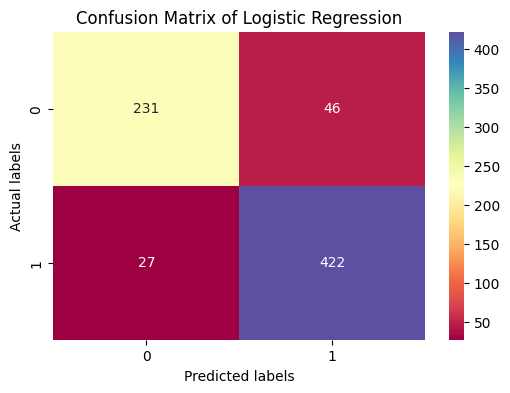

In [35]:
plt.figure(figsize=(6, 4))
sns.heatmap(lr_cm, annot=True, cmap='Spectral', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [36]:
print("The Classification Report of Logistic Regression")
print(classification_report(y_test, y_pred))

The Classification Report of Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       277
           1       0.90      0.94      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726



### Decision Tree

In [37]:
dt_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of Decision Tree Classifier:")
print(dt_cm)

Confusion Matrix of Decision Tree Classifier:
[[231  46]
 [ 27 422]]


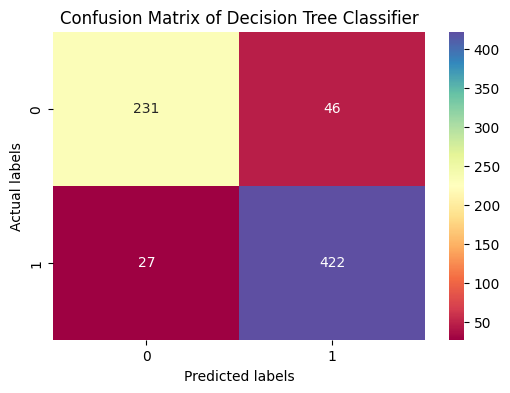

In [38]:
plt.figure(figsize=(6, 4))
sns.heatmap(dt_cm, annot=True, cmap='Spectral', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix of Decision Tree Classifier')
plt.show()

In [39]:
print("The Classification Report of Decision Tree Classifier")
print(classification_report(y_test, y_pred, zero_division=1))

The Classification Report of Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       277
           1       0.90      0.94      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726



### Random Forest

In [40]:
rf_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of Random Forest Classifier:")
print(rf_cm)

Confusion Matrix of Random Forest Classifier:
[[231  46]
 [ 27 422]]


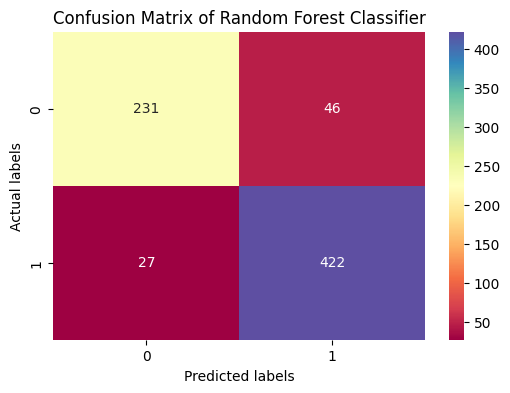

In [41]:
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, cmap='Spectral', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.show()

In [42]:
print("The Classification Report of Random Forest Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Random Forest Classifier
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       277
           1       0.90      0.94      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726



### Gradient Boosting

In [43]:
gb_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of Gradient Boosting Classifier:")
print(gb_cm)

Confusion Matrix of Gradient Boosting Classifier:
[[231  46]
 [ 27 422]]


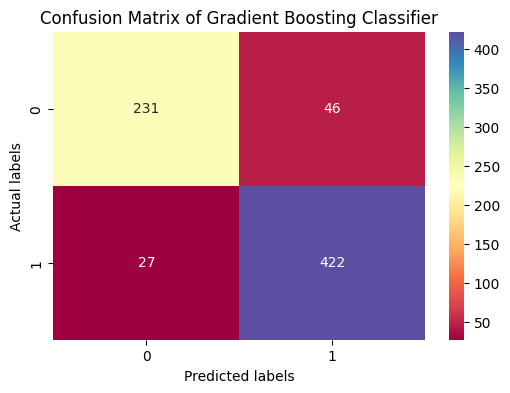

In [44]:
plt.figure(figsize=(6, 4))
sns.heatmap(gb_cm, annot=True, cmap='Spectral', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix of Gradient Boosting Classifier')
plt.show()

In [45]:
print("The Classification Report of Gradient Boosting Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       277
           1       0.90      0.94      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726



## Deployment

Save model Logistic Regression

In [46]:
joblib.dump(clf_lr_grid, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

In [47]:
# Load model di enviroment
grid = joblib.load("logistic_regression_model.joblib")

# Simpan ulang hanya model terbaik
joblib.dump(grid.best_estimator_, "logistic_regression_best_model.joblib")

['logistic_regression_best_model.joblib']